# WEEK 6 실전분석 프로젝트
## hw1 숫자 손글씨 분류하기 프로젝트 완성

-----------
## 문제 정의
28x28 픽셀의 손글씨 숫자 이미지를 입력받아 실제 숫자를 인식한다

## 가설 수립
28x28 픽셀 데이터, 즉 784 종의 특징 데이터를 구성한 후,  
머신 러닝을 통해 실제로 어떤 숫자인지 추측할 수 있다.

## 목표
28x28 사이즈의 숫자 손글씨 이미지로부터 label 값을 얻어낸다

## 데이터 구성
input data = 784개의 입력 데이터 (28x28 픽셀이므로) X 10000개 데이터  
output data = label (어떤 숫자인가?)  

---------

## <분석가이드>
1단계: 데이터 불러오기 (digit.csv)  
2단계: EDA & Feature Engineering  
3단계: Dataset 구성하기  
4단계: 모델링과 학습  
5단계: 모델 검증  

-------------------

즉, 데이터를 8:2 로 나누어 8할을 train set로 삼고,  
데이터 픽셀값을 x_train으로, label(실제 숫자, 정답)값을 y_train으로 두고 학습(fit)시킨다.  
이후 test set으로 검증하면 ok

In [1]:
# 1 데이터 불러오기
import numpy as np
import pandas as pd

df = pd.read_csv('data/digit.csv')
df.head()

,"pixel 1,1","pixel 1,2","pixel 1,3","pixel 1,4","pixel 1,5","pixel 1,6","pixel 1,7","pixel 1,8","pixel 1,9","pixel 1,10",...,"pixel 28,20","pixel 28,21","pixel 28,22","pixel 28,23","pixel 28,24","pixel 28,25","pixel 28,26","pixel 28,27","pixel 28,28",label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [2]:
# 2 EDA & Feature Engineering
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

df.describe()

,"pixel 1,1","pixel 1,2","pixel 1,3","pixel 1,4","pixel 1,5","pixel 1,6","pixel 1,7","pixel 1,8","pixel 1,9","pixel 1,10",...,"pixel 28,20","pixel 28,21","pixel 28,22","pixel 28,23","pixel 28,24","pixel 28,25","pixel 28,26","pixel 28,27","pixel 28,28",label
count,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000480,0.000239,0.000050,0.000025,0.0,0.0,0.0,0.0,0.0,4.453400
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.017804,0.013588,0.003535,0.002500,0.0,0.0,0.0,0.0,0.0,2.884451
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,2.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,4.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,7.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.988281,0.988281,0.250000,0.250000,0.0,0.0,0.0,0.0,0.0,9.000000


In [10]:
# label이 뭐지??? => 실제 숫자 정보(답)
pd.DataFrame(df['label'])


,label
0,4
1,8
2,8
3,7
4,4
...,...
9995,9
9996,7
9997,0
9998,5


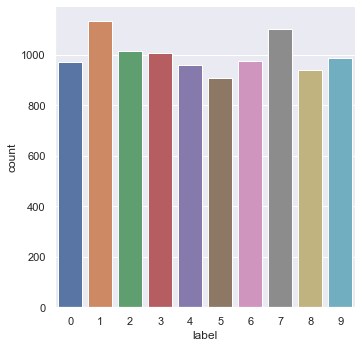

In [8]:
sns.catplot(data=df, x='label', kind='count')
# data는 df 사용, 각 숫자가 얼마나 분포되어있는가

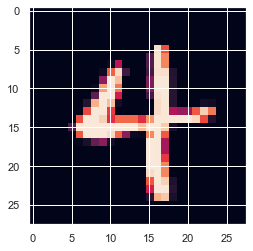

In [11]:
# 이미지 살펴보기
numbers= df.drop(['label'], axis=1) # 정답데이터는 빼기

nth = 0 # 0~9999
img = np.reshape(numbers.iloc[nth].values, [28,28])
plt.imshow(img)
plt.show()

In [12]:
# 3. Dataset 구성하기
train_data = df.drop('label', axis=1)
target_data = df['label']

print(train_data.shape, target_data.shape)

(10000, 784) (10000,)


In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_data, target_data, test_size=0.2)

print(train_data.shape, x_train.shape, x_test.shape) # 8:2 확인하기

(10000, 784) (8000, 784) (2000, 784)


In [14]:
# 4. 모델링과 학습
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100)

In [15]:
# traindata 학습 - fit
forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [16]:
print('training set accuracy:', forest.score(x_train, y_train))

training set accuracy: 1.0


test set accuracy: 0.938


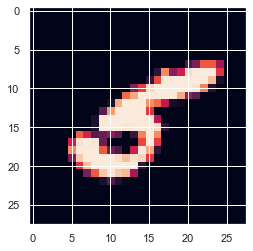

인식된 숫자는 5 입니다.


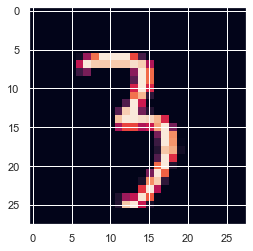

인식된 숫자는 3 입니다.


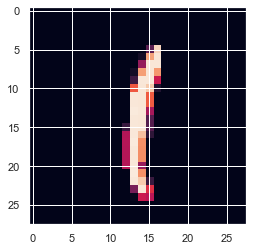

인식된 숫자는 1 입니다.


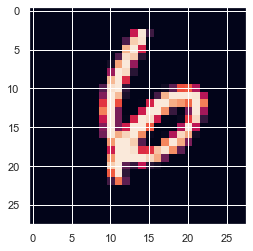

인식된 숫자는 6 입니다.


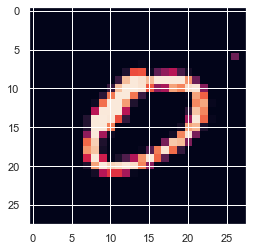

인식된 숫자는 0 입니다.


In [18]:
# 5. 모델 검증
print('test set accuracy:', forest.score(x_test, y_test)) # 인식정확도 출력


# 실제 예측 결과물 살펴보기
import random
for i in range(5):
    n= random.randrange(0, len(x_test)) #랜덤으로 번호 정해
    
    img = np.reshape(x_test.iloc[n].values, [28,28])
    plt.imshow(img) # 숫자 값을 이미지로 보여줘
    plt.show()
    
    result = forest.predict([x_test.iloc[n].values])[0]
    print("인식된 숫자는", result, "입니다.")